# Checking for Hypothyroidism

# 1. Defining the Question

### a) Specifying the Question

> We are to Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid. 

### b) Defining the Metric for Success

> we will perform a cross validation if you want to check the accuracy of your system. we will split you data set into two parts. The first one is used to learn the system. Then we will perform the prediction process on the second part of the data set and compared the predicted results with the good ones.

### c) Understanding the context 

> Hypothyroidism may not cause noticeable symptoms in the early stages. Over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.

### d) Recording the Experimental Design

1. Loading the datasets
2. Data Preparation
3. Investigating the dataset
4. Data cleaning
5. Exploratory Data Analysis(Univariate, Bivariate, Multivariate)
6. Modelling
7. Answering the question
8. Conclusion
9. Recommendation
10. Follow up questions

### e) Data Relevance

We will measure the relevance after doing analysis of the dataset.

# 2. Reading the Data

## Importing Libraries

In [500]:
# Importing libraries
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading datasets

In [501]:
hypothyroid = pd.read_csv('hypothyroid.csv')

# 3. Checking the Data

In [502]:
# top of dataset
hypothyroid.head()

status age sex on_thyroxine query_on_thyroxine  \
0  hypothyroid  72   M            f                  f   
1  hypothyroid  15   F            t                  f   
2  hypothyroid  24   M            f                  f   
3  hypothyroid  24   F            f                  f   
4  hypothyroid  77   M            f                  f   

  on_antithyroid_medication thyroid_surgery query_hypothyroid  \
0                         f               f                 f   
1                         f               f                 f   
2                         f               f                 f   
3                         f               f                 f   
4                         f               f                 f   

  query_hyperthyroid pregnant  ... T3_measured    T3 TT4_measured TT4  \
0                  f        f  ...           y  0.60            y  15   
1                  f        f  ...           y  1.70            y  19   
2                  f        f  ...           y  0.20            y   4   
3                  f        f  ...           y  0.40            y   6   
4                  f        f  ...           y  1.20            y  57   

  T4U_measured   T4U FTI_measured FTI TBG_measured TBG  
0            y  1.48            y  10            n   ?  
1            y  1.13            y  17            n   ?  
2            y     1            y   0            n   ?  
3            y  1.04            y   6            n   ?  
4            y  1.28            y  44            n   ?  

[5 rows x 26 columns]

In [503]:
# bottom of dataset

hypothyroid.tail()

status age sex on_thyroxine query_on_thyroxine  \
3158  negative  58   F            f                  f   
3159  negative  29   F            f                  f   
3160  negative  77   M            f                  f   
3161  negative  74   F            f                  f   
3162  negative  56   F            t                  f   

     on_antithyroid_medication thyroid_surgery query_hypothyroid  \
3158                         f               f                 f   
3159                         f               f                 f   
3160                         f               f                 f   
3161                         f               f                 f   
3162                         f               f                 f   

     query_hyperthyroid pregnant  ... T3_measured    T3 TT4_measured  TT4  \
3158                  f        f  ...           y  1.70            y   86   
3159                  f        f  ...           y  1.80            y   99   
3160                  f        f  ...           y  0.60            y   71   
3161                  f        f  ...           y  0.10            y   65   
3162                  f        f  ...           y  1.80            y  139   

     T4U_measured   T4U FTI_measured  FTI TBG_measured TBG  
3158            y  0.91            y   95            n   ?  
3159            y  1.01            y   98            n   ?  
3160            y  0.68            y  104            n   ?  
3161            y  0.48            y  137            n   ?  
3162            y  0.97            y  143            n   ?  

[5 rows x 26 columns]

In [504]:
# Determining the no. of records in our hypothyroid dataset
#
hypothyroid.count()

status                       3163
age                          3163
sex                          3163
on_thyroxine                 3163
query_on_thyroxine           3163
on_antithyroid_medication    3163
thyroid_surgery              3163
query_hypothyroid            3163
query_hyperthyroid           3163
pregnant                     3163
sick                         3163
tumor                        3163
lithium                      3163
goitre                       3163
TSH_measured                 3163
TSH                          3163
T3_measured                  3163
T3                           3163
TT4_measured                 3163
TT4                          3163
T4U_measured                 3163
T4U                          3163
FTI_measured                 3163
FTI                          3163
TBG_measured                 3163
TBG                          3163
dtype: int64

In [505]:
# Checking whether each column has an appropriate datatype
#
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [506]:
hypothyroid['status'].values

array(['hypothyroid', 'hypothyroid', 'hypothyroid', ..., 'negative',
       'negative', 'negative'], dtype=object)

# 4. External Data Source Validation

> Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

# 5. Data Cleaning

In [507]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

### a. Validation

In [508]:
# dealing with white spaces
hypothyroid.columns = hypothyroid.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
hypothyroid.columns

/tmp/ipykernel_6557/3238624708.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hypothyroid.columns = hypothyroid.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [509]:
hypothyroid.head()

status age sex on_thyroxine query_on_thyroxine  \
0  hypothyroid  72   M            f                  f   
1  hypothyroid  15   F            t                  f   
2  hypothyroid  24   M            f                  f   
3  hypothyroid  24   F            f                  f   
4  hypothyroid  77   M            f                  f   

  on_antithyroid_medication thyroid_surgery query_hypothyroid  \
0                         f               f                 f   
1                         f               f                 f   
2                         f               f                 f   
3                         f               f                 f   
4                         f               f                 f   

  query_hyperthyroid pregnant  ... t3_measured    t3 tt4_measured tt4  \
0                  f        f  ...           y  0.60            y  15   
1                  f        f  ...           y  1.70            y  19   
2                  f        f  ...           y  0.20            y   4   
3                  f        f  ...           y  0.40            y   6   
4                  f        f  ...           y  1.20            y  57   

  t4u_measured   t4u fti_measured fti tbg_measured tbg  
0            y  1.48            y  10            n   ?  
1            y  1.13            y  17            n   ?  
2            y     1            y   0            n   ?  
3            y  1.04            y   6            n   ?  
4            y  1.28            y  44            n   ?  

[5 rows x 26 columns]

In [510]:
# change to right data type

hypothyroid['age'] = pd.to_numeric(hypothyroid['age'],errors = 'coerce')
hypothyroid['t3'] = pd.to_numeric(hypothyroid['t3'],errors = 'coerce')
hypothyroid['tt4'] = pd.to_numeric(hypothyroid['tt4'],errors = 'coerce')
hypothyroid['t4u'] = pd.to_numeric(hypothyroid['t4u'],errors = 'coerce')
hypothyroid['fti'] = pd.to_numeric(hypothyroid['fti'],errors = 'coerce')

In [511]:
# checking change
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3163 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

## Checking outliers

/home/mirana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mirana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mirana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/m

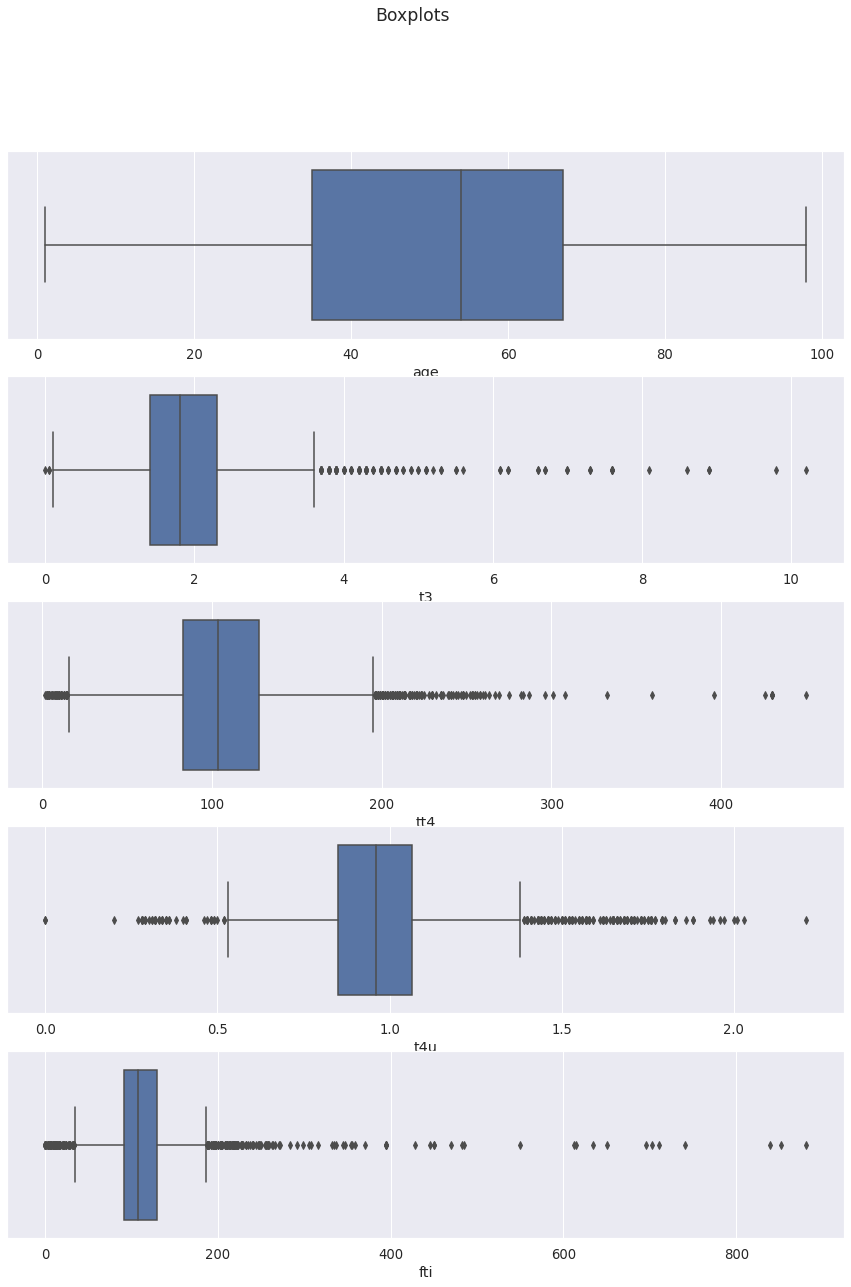

In [512]:
# Checking for Outliers
#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(15, 20))
fig.suptitle('Boxplots')
sns.boxplot(hypothyroid['age'], ax=ax1)
sns.boxplot(hypothyroid['t3'], ax=ax2)
sns.boxplot(hypothyroid['tt4'], ax=ax3)
sns.boxplot(hypothyroid['t4u'], ax=ax4)
sns.boxplot(hypothyroid['fti'], ax=ax5)




plt.show()

There seems to be a lot of outliers.

## checking missing data

In [513]:
# Identifying the Missing Data
# ranking
hypothyroid.isnull().sum().sum()

1885

In [514]:
# checking shape 
hypothyroid.shape

(3163, 26)

In [515]:
# Dealing with the Missing Data
#
hypothyroid.fillna(hypothyroid.mean(), inplace=True)

/tmp/ipykernel_6557/3207605939.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hypothyroid.fillna(hypothyroid.mean(), inplace=True)


In [516]:
# confirming no missing values

hypothyroid.isnull().sum().sum()

0

## checking duplicates

In [517]:
# checking hypothyroid duplicates and dropping
hypothyroid.duplicated().sum()
hypothyroid.drop_duplicates().head()


status   age sex on_thyroxine query_on_thyroxine  \
0  hypothyroid  72.0   M            f                  f   
1  hypothyroid  15.0   F            t                  f   
2  hypothyroid  24.0   M            f                  f   
3  hypothyroid  24.0   F            f                  f   
4  hypothyroid  77.0   M            f                  f   

  on_antithyroid_medication thyroid_surgery query_hypothyroid  \
0                         f               f                 f   
1                         f               f                 f   
2                         f               f                 f   
3                         f               f                 f   
4                         f               f                 f   

  query_hyperthyroid pregnant  ... t3_measured   t3 tt4_measured   tt4  \
0                  f        f  ...           y  0.6            y  15.0   
1                  f        f  ...           y  1.7            y  19.0   
2                  f        f  ...           y  0.2            y   4.0   
3                  f        f  ...           y  0.4            y   6.0   
4                  f        f  ...           y  1.2            y  57.0   

  t4u_measured   t4u fti_measured   fti tbg_measured  tbg  
0            y  1.48            y  10.0            n    ?  
1            y  1.13            y  17.0            n    ?  
2            y  1.00            y   0.0            n    ?  
3            y  1.04            y   6.0            n    ?  
4            y  1.28            y  44.0            n    ?  

[5 rows x 26 columns]

## checking anomalies

### using isolation forest

In [518]:
# rank

from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=1000, contamination=float(0.1))
isolation_forest.fit(hypothyroid['age'].values.reshape(-1, 1))
hypothyroid['anomaly_score_rate'] = isolation_forest.decision_function(hypothyroid['age'].values.reshape(-1, 1))
hypothyroid['anomaly'] = isolation_forest.predict(hypothyroid['age'].values.reshape(-1, 1))
hypothyroid.head()

status   age sex on_thyroxine query_on_thyroxine  \
0  hypothyroid  72.0   M            f                  f   
1  hypothyroid  15.0   F            t                  f   
2  hypothyroid  24.0   M            f                  f   
3  hypothyroid  24.0   F            f                  f   
4  hypothyroid  77.0   M            f                  f   

  on_antithyroid_medication thyroid_surgery query_hypothyroid  \
0                         f               f                 f   
1                         f               f                 f   
2                         f               f                 f   
3                         f               f                 f   
4                         f               f                 f   

  query_hyperthyroid pregnant  ... tt4_measured   tt4 t4u_measured   t4u  \
0                  f        f  ...            y  15.0            y  1.48   
1                  f        f  ...            y  19.0            y  1.13   
2                  f        f  ...            y   4.0            y  1.00   
3                  f        f  ...            y   6.0            y  1.04   
4                  f        f  ...            y  57.0            y  1.28   

  fti_measured   fti tbg_measured  tbg anomaly_score_rate  anomaly  
0            y  10.0            n    ?           0.064379        1  
1            y  17.0            n    ?          -0.060442       -1  
2            y   0.0            n    ?           0.033699        1  
3            y   6.0            n    ?           0.033699        1  
4            y  44.0            n    ?           0.020758        1  

[5 rows x 28 columns]

In [519]:
# predicted anomaly
anomaly=hypothyroid.loc[hypothyroid['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

           status   age sex on_thyroxine query_on_thyroxine  \
1     hypothyroid  15.0   F            t                  f   
5     hypothyroid  85.0   F            f                  f   
25    hypothyroid  84.0   F            f                  f   
27    hypothyroid  83.0   F            f                  f   
45    hypothyroid  79.0   F            f                  f   
...           ...   ...  ..          ...                ...   
3094     negative  80.0   M            f                  f   
3111     negative  89.0   M            f                  f   
3131     negative  16.0   F            f                  f   
3147     negative  80.0   F            f                  f   
3150     negative  15.0   M            f                  f   

     on_antithyroid_medication thyroid_surgery query_hypothyroid  \
1                            f               f                 f   
5                            f               f                 t   
25                           f         

In [520]:
# checking ouliers above the given threshold
#outliers_counter = len(hypothyroid[hypothyroid['age'] > 100])
#outliers_counter

In [521]:
# accuracy of model

# print("Accuracy percentage:", 100*list(hypothyroid['anomaly']).count(-1)/(anomaly))

In [522]:
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        3163 non-null   float64
 2   sex                        3163 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

# 6. Exploratory Data Analysis: 

## Univariate analysis

In [523]:
# Ploting the univariate summaries and recording our observations


hypothyroid.describe()

age           t3          tt4          t4u          fti  \
count  3163.000000  3163.000000  3163.000000  3163.000000  3163.000000   
mean     51.154214     1.939749   108.850000     0.978199   115.397771   
std      17.881969     0.880441    43.657766     0.217513    57.838927   
min       1.000000     0.000000     2.000000     0.000000     0.000000   
25%      38.000000     1.500000    85.000000     0.860000    92.000000   
50%      51.154214     1.939749   107.000000     0.978199   110.000000   
75%      64.000000     2.200000   124.000000     1.050000   126.000000   
max      98.000000    10.200000   450.000000     2.210000   881.000000   

       anomaly_score_rate      anomaly  
count         3163.000000  3163.000000  
mean             0.064727     0.809674  
std              0.062604     0.586972  
min             -0.202008    -1.000000  
25%              0.045853     1.000000  
50%              0.058229     1.000000  
75%              0.082525     1.000000  
max              0.180575     1.000000

In [524]:
# quantiles

hypothyroid.quantile([0.25,0.5,0.75])

age        t3    tt4       t4u    fti  anomaly_score_rate  anomaly
0.25  38.000000  1.500000   85.0  0.860000   92.0            0.045853      1.0
0.50  51.154214  1.939749  107.0  0.978199  110.0            0.058229      1.0
0.75  64.000000  2.200000  124.0  1.050000  126.0            0.082525      1.0

In [525]:
# skewness
hypothyroid.skew()

/tmp/ipykernel_6557/1165111864.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hypothyroid.skew()


age                  -0.175276
t3                    2.401958
tt4                   1.571505
t4u                   0.954853
fti                   5.317936
anomaly_score_rate   -0.219653
anomaly              -2.760562
dtype: float64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'t3'}>,
        <AxesSubplot:title={'center':'tt4'}>],
       [<AxesSubplot:title={'center':'t4u'}>,
        <AxesSubplot:title={'center':'fti'}>,
        <AxesSubplot:title={'center':'anomaly_score_rate'}>],
       [<AxesSubplot:title={'center':'anomaly'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

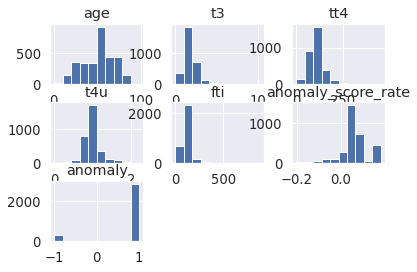

In [526]:
# histogram for total_points 
hypothyroid.hist()

## Bivariate analysis

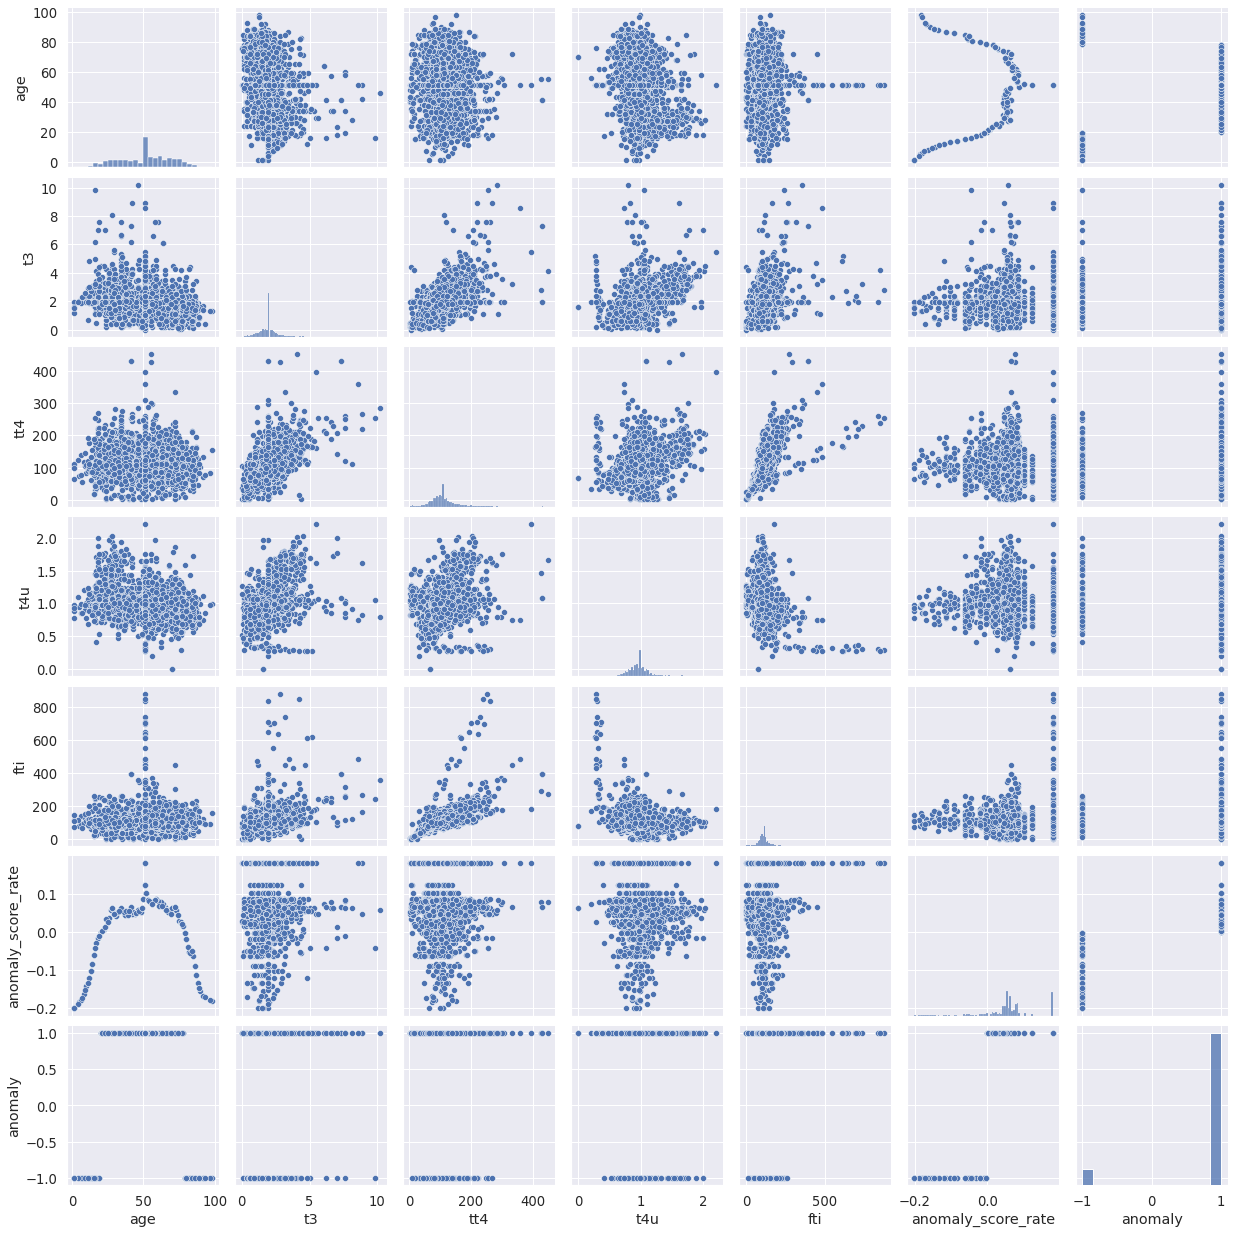

In [527]:
# Ploting the bivariate summaries and recording our observations

sns.pairplot(hypothyroid)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


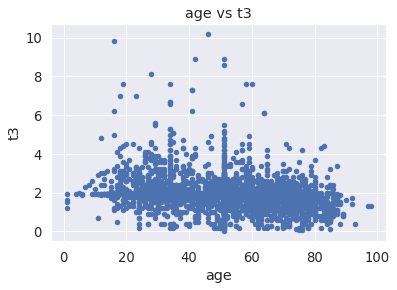

In [528]:
# Using Pandas: Plotting our scatterplot to compare the variables
hypothyroid.plot(x = 'age', y = 't3', kind='scatter')

# Giving our scatterplot a title
plt.title('age vs t3')

# Labelling our x axis
plt.xlabel('age')

# Labelling our y axis
plt.ylabel('t3')

# We then display our scatterplot as shown below
plt.show()

In [529]:
# general correlation
hypothyroid.corr()

age        t3       tt4       t4u       fti  \
age                 1.000000 -0.268648 -0.091175 -0.194656  0.015460   
t3                 -0.268648  1.000000  0.545331  0.388043  0.293912   
tt4                -0.091175  0.545331  1.000000  0.322826  0.684872   
t4u                -0.194656  0.388043  0.322826  1.000000 -0.283253   
fti                 0.015460  0.293912  0.684872 -0.283253  1.000000   
anomaly_score_rate  0.053724  0.009311 -0.014059 -0.082411  0.094445   
anomaly            -0.023597  0.020242 -0.005334  0.002302  0.004553   

                    anomaly_score_rate   anomaly  
age                           0.053724 -0.023597  
t3                            0.009311  0.020242  
tt4                          -0.014059 -0.005334  
t4u                          -0.082411  0.002302  
fti                           0.094445  0.004553  
anomaly_score_rate            1.000000  0.634000  
anomaly                       0.634000  1.000000

<AxesSubplot:>

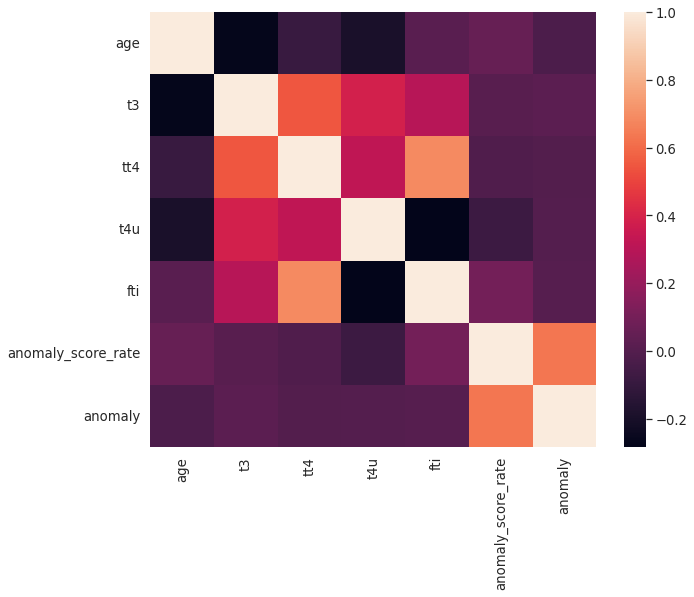

In [530]:
# heatmap for looking at how the variables interact
columns = ('age', 't3')
f, ax = plt.subplots(figsize=(10, 8))
corr = hypothyroid.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [531]:
# correlation
# Calculating the pearson coefficient
pc = hypothyroid["age"].corr(hypothyroid["t3"], method="pearson") 
print(pc)

# Checking whether you have to define the pearson
coeff = hypothyroid["age"].corr(hypothyroid["t3"]) 
print(coeff)

-0.2686477400417729
-0.2686477400417729


In [532]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg',
       'anomaly_score_rate', 'anomaly'],
      dtype='object')

In [533]:
hypothyroid.head()

status   age sex on_thyroxine query_on_thyroxine  \
0  hypothyroid  72.0   M            f                  f   
1  hypothyroid  15.0   F            t                  f   
2  hypothyroid  24.0   M            f                  f   
3  hypothyroid  24.0   F            f                  f   
4  hypothyroid  77.0   M            f                  f   

  on_antithyroid_medication thyroid_surgery query_hypothyroid  \
0                         f               f                 f   
1                         f               f                 f   
2                         f               f                 f   
3                         f               f                 f   
4                         f               f                 f   

  query_hyperthyroid pregnant  ... tt4_measured   tt4 t4u_measured   t4u  \
0                  f        f  ...            y  15.0            y  1.48   
1                  f        f  ...            y  19.0            y  1.13   
2                  f        f  ...            y   4.0            y  1.00   
3                  f        f  ...            y   6.0            y  1.04   
4                  f        f  ...            y  57.0            y  1.28   

  fti_measured   fti tbg_measured  tbg anomaly_score_rate  anomaly  
0            y  10.0            n    ?           0.064379        1  
1            y  17.0            n    ?          -0.060442       -1  
2            y   0.0            n    ?           0.033699        1  
3            y   6.0            n    ?           0.033699        1  
4            y  44.0            n    ?           0.020758        1  

[5 rows x 28 columns]

In [534]:
# picking columns for normality test
hypothyroid_norm =  hypothyroid[['age','t3','tt4','t4u','fti']]
hypothyroid_norm.head()

age   t3   tt4   t4u   fti
0  72.0  0.6  15.0  1.48  10.0
1  15.0  1.7  19.0  1.13  17.0
2  24.0  0.2   4.0  1.00   0.0
3  24.0  0.4   6.0  1.04   6.0
4  77.0  1.2  57.0  1.28  44.0

/home/mirana/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


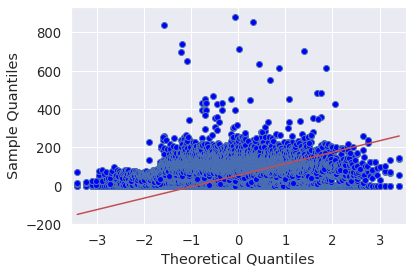

In [535]:
# q-q plot
from statsmodels.graphics.gofplots import qqplot
from numpy.random import seed

# seed the random number generator
seed(1)

# q-q plot
qqplot(hypothyroid_norm, line='s')
plt.show()

## 7. Implementing the Solution

### encoding categorical variables

In [536]:
# Categorical boolean mask
categorical = hypothyroid.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = hypothyroid.columns[categorical].tolist()

In [537]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

In [538]:
# apply le on categorical feature columns
hypothyroid[categorical_cols] = hypothyroid[categorical_cols].apply(lambda col: le.fit_transform(col))

hypothyroid[categorical_cols].head(10)

status  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0       0    2             0                   0                          0   
1       0    1             1                   0                          0   
2       0    2             0                   0                          0   
3       0    1             0                   0                          0   
4       0    2             0                   0                          0   
5       0    1             0                   0                          0   
6       0    1             0                   0                          0   
7       0    1             0                   0                          0   
8       0    1             0                   0                          0   
9       0    1             0                   0                          0   

   thyroid_surgery  query_hypothyroid  query_hyperthyroid  pregnant  sick  \
0                0                  0                   0         0     0   
1                0                  0                   0         0     0   
2                0                  0                   0         0     0   
3                0                  0                   0         0     0   
4                0                  0                   0         0     0   
5                0                  1                   0         0     0   
6                1                  0                   0         0     0   
7                0                  0                   0         0     0   
8                0                  1                   0         0     0   
9                0                  0                   0         0     0   

   ...  lithium  goitre  tsh_measured  tsh  t3_measured  tt4_measured  \
0  ...        0       0             1  134            1             1   
1  ...        0       0             1   79            1             1   
2  ...        0       0             1    0            1             1   
3  ...        0       0             1  158            1             1   
4  ...        0       0             1  200            1             1   
5  ...        0       0             1   72            1             1   
6  ...        0       0             1  204            1             1   
7  ...        0       0             1  110            1             1   
8  ...        0       0             1  237            0             1   
9  ...        0       0             1  163            0             1   

   t4u_measured  fti_measured  tbg_measured  tbg  
0             1             1             0   52  
1             1             1             0   52  
2             1             1             0   52  
3             1             1             0   52  
4             1             1             0   52  
5             1             1             0   52  
6             1             1             0   52  
7             1             1             0   52  
8             1             1             0   52  
9             1             1             0   52  

[10 rows x 21 columns]

In [539]:
# applying a one hot encoder
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(hypothyroid[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=hypothyroid.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = hypothyroid.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)


In [540]:
hypothyroid.head()

status   age  sex  on_thyroxine  query_on_thyroxine  \
0       0  72.0    2             0                   0   
1       0  15.0    1             1                   0   
2       0  24.0    2             0                   0   
3       0  24.0    1             0                   0   
4       0  77.0    2             0                   0   

   on_antithyroid_medication  thyroid_surgery  query_hypothyroid  \
0                          0                0                  0   
1                          0                0                  0   
2                          0                0                  0   
3                          0                0                  0   
4                          0                0                  0   

   query_hyperthyroid  pregnant  ...  tt4_measured   tt4  t4u_measured   t4u  \
0                   0         0  ...             1  15.0             1  1.48   
1                   0         0  ...             1  19.0             1  1.13   
2                   0         0  ...             1   4.0             1  1.00   
3                   0         0  ...             1   6.0             1  1.04   
4                   0         0  ...             1  57.0             1  1.28   

   fti_measured   fti  tbg_measured  tbg  anomaly_score_rate  anomaly  
0             1  10.0             0   52            0.064379        1  
1             1  17.0             0   52           -0.060442       -1  
2             1   0.0             0   52            0.033699        1  
3             1   6.0             0   52            0.033699        1  
4             1  44.0             0   52            0.020758        1  

[5 rows x 28 columns]

### Decision tree classifier

Let's try to use a decision tree classifier.

In [541]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = hypothyroid['status'].values

test_features = ['sex', 'on_thyroxine', 'age', 'on_antithyroid_medication', 'thyroid_surgery', 'pregnant','sick','tumor','goitre']
# the above will be the first features.

X = hypothyroid[test_features].values

# Train using 70% of the hypothyroid.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



Let's finally create our model and assess its accuracy. 

In [542]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9494204425711275


one tree classifier gives an accuracy of 94.94%. However what happens when we boost it.

In this case status has two values: 0, and 1. We give matching class names to each: 'hypothyroid', 'non-hypothyroid'

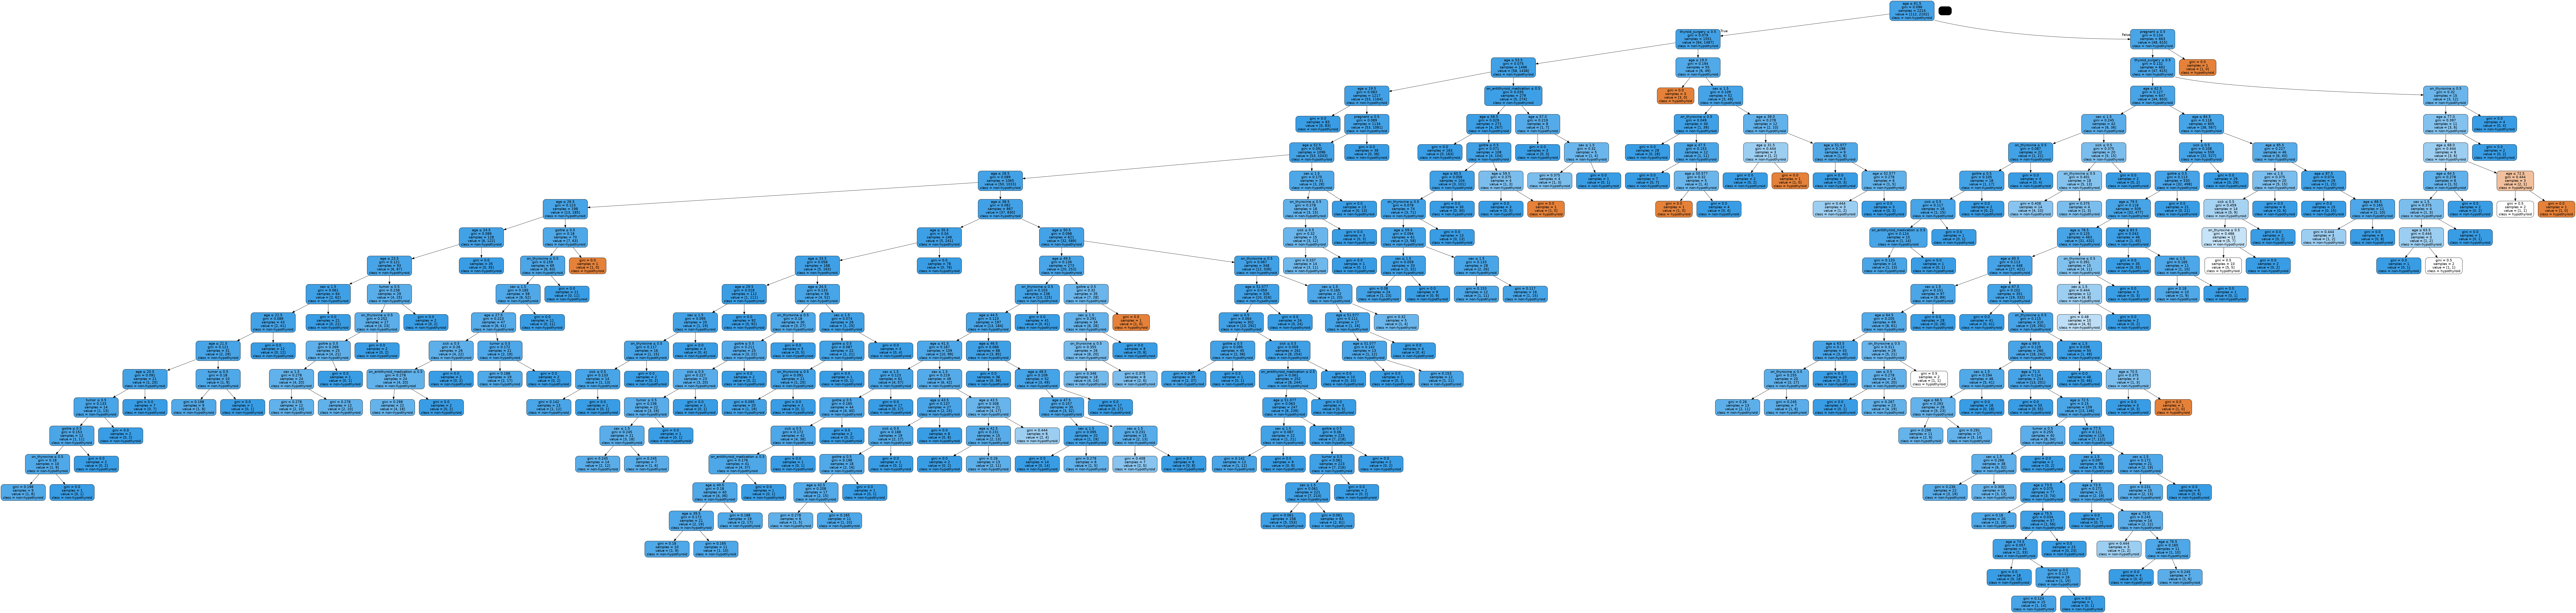

In [543]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from six import StringIO


dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['hypothyroid', 'non-hypothyroid'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidclassifier.png')
Image(graph.create_png())

### boosting our decision tree

In [544]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


In [545]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [546]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [547]:
# Let's now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.045310853530031614
Mean Squared Error: 0.045310853530031614
Root Mean Squared Error: 0.21286346217712332


In [548]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9546891464699684


Wow, boosting the decision tree using adaboost actually increased the accuracy to 95.47%

### using Gradient boost

In [549]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [550]:
# scaling our data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [551]:
# split data 
state = 12  
test_size = 0.30  
  
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=state)

In [552]:
# let us now set different learning rates
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))


Learning rate:  0.05
Accuracy score (training): 0.946
Accuracy score (validation): 0.964
Learning rate:  0.075
Accuracy score (training): 0.946
Accuracy score (validation): 0.964
Learning rate:  0.1
Accuracy score (training): 0.946
Accuracy score (validation): 0.964
Learning rate:  0.25
Accuracy score (training): 0.947
Accuracy score (validation): 0.967
Learning rate:  0.5
Accuracy score (training): 0.947
Accuracy score (validation): 0.964
Learning rate:  0.75
Accuracy score (training): 0.946
Accuracy score (validation): 0.958
Learning rate:  1
Accuracy score (training): 0.946
Accuracy score (validation): 0.958


In [553]:
# evaluate our model
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[  0  24]
 [  0 641]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.96      1.00      0.98       641

    accuracy                           0.96       665
   macro avg       0.48      0.50      0.49       665
weighted avg       0.93      0.96      0.95       665



/home/mirana/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mirana/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mirana/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


we can conclude that boosting our model actually improves our accuracy.The gradient boost outputs an accuracy of 95% which is better than one decision tree.

This time we use DecisionTreeRegressor() instead of the classifier. We can easily assess our performance by quickly describing our predictions versus the actual data.

### Decision tree regressor

In [554]:
# Create a decision tree regressor
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

Actual   Predicted
count  949.000000  949.000000
mean     0.954689    0.930801
std      0.208095    0.146091
min      0.000000    0.000000
25%      1.000000    0.920000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000

That looks extremely correct, but what do our metrics say?

In [555]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.10321926519062961
Mean Squared Error: 0.06012847792109304
Root Mean Squared Error: 0.24521108849538809


According to the results above, the error is low. However, Let's try and balance things out by adding a maximum depth to the tree, and a minimum split size. Let's try training a new model

In [556]:
# Create a decision tree regressor

updated_tree = DecisionTreeRegressor(min_samples_split = 20, max_depth=5)

# Train it on our training set.
updated_tree = updated_tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = updated_tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()



Actual   Predicted
count  949.000000  949.000000
mean     0.954689    0.946276
std      0.208095    0.050533
min      0.000000    0.666667
25%      1.000000    0.924324
50%      1.000000    0.965714
75%      1.000000    0.967033
max      1.000000    1.000000

In [557]:
# Let's now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.0926103472684326
Mean Squared Error: 0.04432363234654708
Root Mean Squared Error: 0.2105317846467537


Our model still performs extremely well. The errors are less. The MAE, MSE and RMSE, dropped slightly making this model is more accurate but more applicable to other data points outside our dataset.

Let's do some viz:

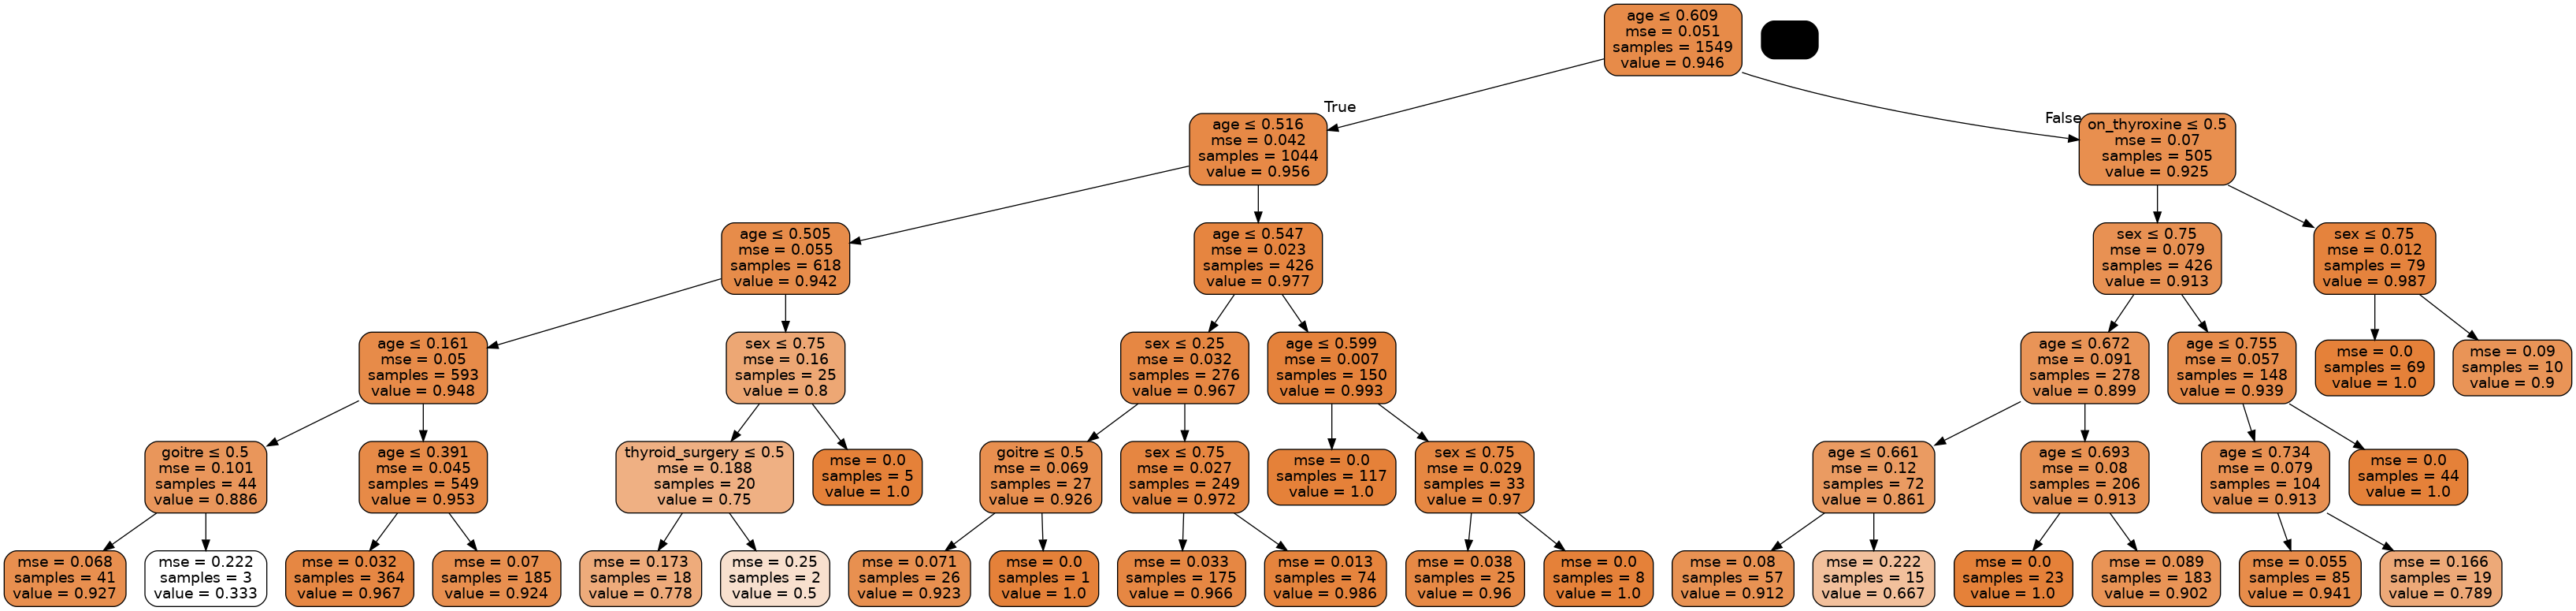

In [558]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(updated_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism.png')
Image(graph.create_png())


Let's now use many trees instead.

### Random forest

In [559]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = hypothyroid['status'].values


test_features = hypothyroid.columns.to_list()
test_features.remove('status')
# 'query_on_thyroxine','query_hypothyroid','query_hyperthyroid', 'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
# 't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg', 'lithium'])

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = hypothyroid[test_features].values

# Train using 80% of the hypothyroid.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


Actual   Predicted
count  949.000000  949.000000
mean     0.958904    0.956708
std      0.198617    0.180949
min      0.000000    0.042578
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000

Let's assess how well our random forest is doing.

In [560]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.02296410965789222
Mean Squared Error: 0.014253966023021999
Root Mean Squared Error: 0.1193899745498842


Our model's performance has improved generally. The random forest beats our individual trees by far.

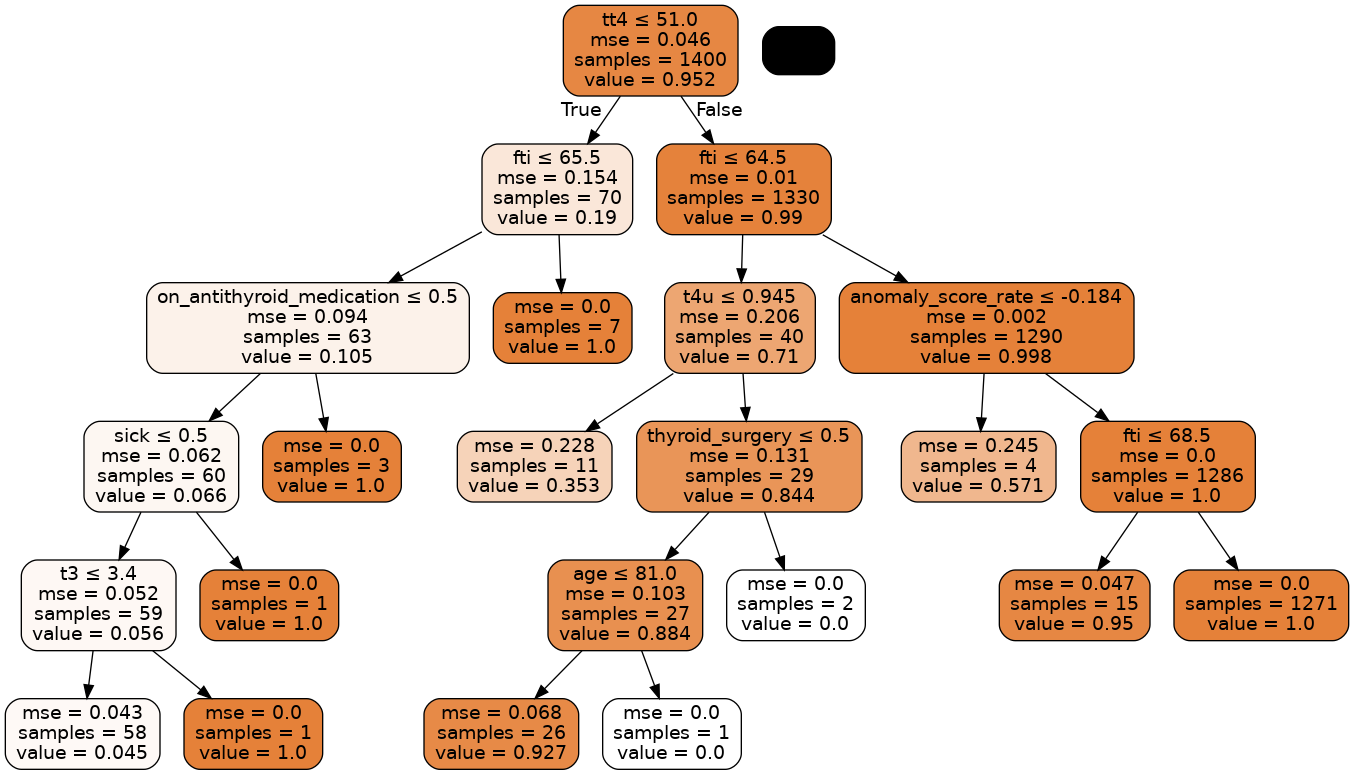

In [561]:
# let us check tree number 50

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())


our graph now shows new features

Let us now visualize some feature importance

In [562]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.02), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.04), ('thyroid_surgery', 0.02), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.01), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh_measured', 0.0), ('tsh', 0.0), ('t3_measured', 0.0), ('t3', 0.01), ('tt4_measured', 0.0), ('tt4', 0.72), ('t4u_measured', 0.0), ('t4u', 0.03), ('fti_measured', 0.0), ('fti', 0.14), ('tbg_measured', 0.0), ('tbg', 0.0), ('anomaly_score_rate', 0.01), ('anomaly', 0.0)]

Variable: tt4                  Importance: 0.72
Variable: fti                  Importance: 0.14
Variable: on_antithyroid_medication Importance: 0.04
Variable: t4u                  Importance: 0.03
Variable: age                  Importance: 0.02
Variable: thyroid_surgery      Importance: 0.02
Variable: sick                 Importance: 0.01
Variable: t3                   Importance: 0.01
Variable: anomaly_score_rate   Importance: 0.01
V

Let us represent this visually.

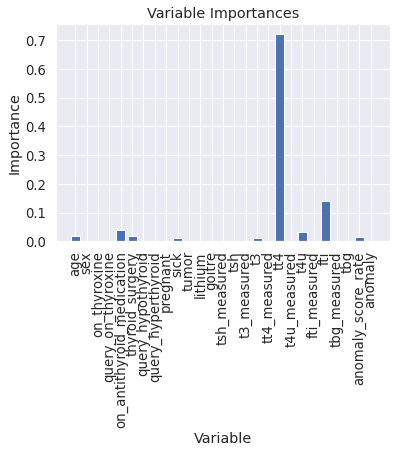

In [563]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


Accordding to the above results, we need to consider tt4 as first. TT4 and fti are the most valuable indicators to consider in patients with hyperthyroidism.

### Support vector machine

In [564]:
# importing libraries 

import seaborn as sns; sns.set(font_scale=1.2)
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

splitting the data

In [565]:
# Seperating the target from our data
X = hypothyroid.drop(['status'],axis=1)
y = hypothyroid['status'] 
#y = np.where(hypothyroid['status']=='hypothyroid',0,1)
#y = np.unique(hypothyroid['status']=='hypothyroid',0,1)
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.shape


(633,)

### fit model using linear function

In [566]:
# Let's now build the svm model 
hypothyroid_model = SVC(kernel = 'linear')
# Train the model using the training set
hypothyroid_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = hypothyroid_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

### performance and evaluating

In [567]:
# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy


0.9778830963665087

The accuray of the model is 97.79% which is a very good score as compared to Decision trees and random forest.

In [568]:
# For further evaluation you can also check the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 17,   9],
       [  5, 602]])

## 8. Challenging the solution

### using other functions to fit our model 

### polynomial

In [570]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [571]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(kernel='poly')

In [572]:
# making prediction
y_pred = polyclassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [573]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9778830963665087
[[ 16  10]
 [  4 603]]


After using the polynomial function the model achieved an accuracy of 97.79% which is similar to the linear function.

### Radial basis function (rbf)

In [575]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', gamma='scale')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC()

In [577]:
# making prediction
y_pred = rbfclassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [578]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9778830963665087
[[ 16  10]
 [  4 603]]


After using the rbf function the model achieved an accuracy of 97.79% which is similar to the linear and polynomial function.

### Sigmoid function

In [579]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid', gamma='scale')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [581]:
# making prediction
y_pred = sigclassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [582]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9415481832543444
[[  3  23]
 [ 14 593]]


After using the rbf function the model achieved an accuracy of 94.15% which is less than for linear, polynomial and rbf functions.  This proves that sigmoid function is the poorest performer.